In [49]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [40]:
def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g

In [41]:
z = np.arange(-10,10)
y = sigmoid(z)
print(np.c_[z, y])

[[-1.00000000e+01  4.53978687e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.00000000e+00  2.47262316e-03]
 [-5.00000000e+00  6.69285092e-03]
 [-4.00000000e+00  1.79862100e-02]
 [-3.00000000e+00  4.74258732e-02]
 [-2.00000000e+00  1.19202922e-01]
 [-1.00000000e+00  2.68941421e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  7.31058579e-01]
 [ 2.00000000e+00  8.80797078e-01]
 [ 3.00000000e+00  9.52574127e-01]
 [ 4.00000000e+00  9.82013790e-01]
 [ 5.00000000e+00  9.93307149e-01]
 [ 6.00000000e+00  9.97527377e-01]
 [ 7.00000000e+00  9.99088949e-01]
 [ 8.00000000e+00  9.99664650e-01]
 [ 9.00000000e+00  9.99876605e-01]]


Text(0.5, 0, 'z')

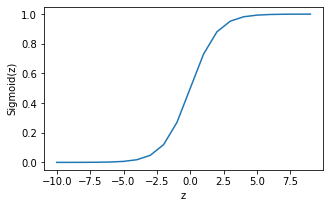

In [42]:
fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.plot(z, y)
ax.set_ylabel("Sigmoid(z)")
ax.set_xlabel("z")

In [43]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])   

In [44]:
def compute_cost_logistic(x, y, w, b):
  m = x.shape[0]
  cost = 0.0
  for i in range(m):
    z_i = np.dot(w,x[i])+b
    f_wb_i = sigmoid(z_i)
    cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
  cost = cost / m
  return cost

In [46]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(x_train, y_train, w_tmp, b_tmp))

0.36686678640551745


In [47]:
def compute_gradient_logistic(x,y,w,b):
  m,n = x.shape
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    z = np.dot(x[i], w) + b
    f_wb_i = sigmoid(z)
    error = f_wb_i - y[i]
    for j in range(n):
      dj_dw = dj_dw + error * x[i,j]
    dj_db = dj_db + error
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db

In [50]:
def gradient_descent(x,y,w_in,b_in,alpha, num_iter):
  J_hist=[]
  w = w_in
  b= b_in

  for i in range(num_iter):
    dj_dw, dj_db = compute_gradient_logistic(x,y,w,b)
    
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i < 10000:
      J_hist.append(compute_cost_logistic(x,y,w,b))
    if i % math.ceil(num_iter / 10) == 0:
      print(f"iteration {i:4d}: Cost {J_hist[-1]}  .")
  
  return w, b, J_hist


In [53]:
w_tmp = np.zeros_like(x_train[0])
b_tmp = 0
alpha = 0.1
iters = 10000

w_final, b_final, J_history = gradient_descent(x_train,y_train, w_tmp, b_tmp, alpha, iters)
print(f"w:{w_final}, b:{b_final}")

iteration    0: Cost 0.6776833627571452  .
iteration 1000: Cost 0.1455531827027191  .
iteration 2000: Cost 0.07649164019776794  .
iteration 3000: Cost 0.05139255824162284  .
iteration 4000: Cost 0.03858471692722778  .
iteration 5000: Cost 0.03085004080989656  .
iteration 6000: Cost 0.025683081110997246  .
iteration 7000: Cost 0.02199121007117215  .
iteration 8000: Cost 0.01922341201538782  .
iteration 9000: Cost 0.017072197258406484  .
w:[5.3497607 5.3497607], b:-14.648237107471077
